In [48]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bengaluru-house-price-data/Bengaluru_House_Data.csv


In [49]:
import pandas as pd,numpy as np,seaborn as sns
from matplotlib import pyplot as plt

In [50]:
df=pd.read_csv('/kaggle/input/bengaluru-house-price-data/Bengaluru_House_Data.csv')

In [51]:
df.shape

(13320, 9)

In [52]:
df.isna().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [54]:
df['size'].nunique()

31

In [55]:
df.drop_duplicates(inplace=True)

In [56]:
df.describe()

,bath,balcony,price
count,12718.000000,12186.000000,12791.000000
mean,2.708602,1.582308,114.317646
std,1.357764,0.822536,151.480310
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,73.000000
75%,3.000000,2.000000,121.000000
max,40.000000,3.000000,3600.000000


In [57]:
df.corr()['price']

bath       0.453099
balcony    0.118645
price      1.000000
Name: price, dtype: float64

In [58]:
df.availability.nunique()

81

In [59]:
df.sample(5)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
6963,Built-up Area,Ready To Move,Electronic City,2 BHK,Pao 3ow,940,2.0,1.0,54.00
12442,Super built-up Area,Ready To Move,Whitefield,2 BHK,AHodsWo,1015,2.0,3.0,56.00
10909,Super built-up Area,Ready To Move,Singasandra,2 BHK,EAvarum,1179,2.0,2.0,56.00
6962,Super built-up Area,Ready To Move,Thanisandra,3 BHK,MenueNo,1430,2.0,2.0,51.48
10150,Super built-up Area,Ready To Move,Choodasandra,3 BHK,GRhtiru,1220,3.0,1.0,56.00


In [60]:
df2=df.drop(['area_type','availability','society','balcony'],axis=1)

In [61]:
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [62]:
df1=df2.dropna()

In [63]:
df1.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [64]:
df1['bhk']=df1['size'].apply(lambda x:int(x.split()[0]))

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [65]:
df1.drop('size',axis=1,inplace=True)

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [66]:
df1.loc[df1.total_sqft.str.contains('-')]

,location,total_sqft,bath,price,bhk
30,Yelahanka,2100 - 2850,4.0,186.000,4
122,Hebbal,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,1042 - 1105,2.0,54.005,2
165,Sarjapur,1145 - 1340,2.0,43.490,2
188,KR Puram,1015 - 1540,2.0,56.800,2
...,...,...,...,...,...
12955,Thanisandra,1437 - 1629,3.0,75.885,3
12975,Whitefield,850 - 1060,2.0,38.190,2
12990,Talaghattapura,1804 - 2273,3.0,122.000,3
13059,Harlur,1200 - 1470,2.0,72.760,2


In [67]:
df.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [68]:
def clean_fxn(x):
    t=x.split('-')
    if len(t)==2:
        return (float(t[0])+float(t[1]))/2
    try:
        return float(x)
    except:
        return None

In [69]:
df1['total_sqft']=df1['total_sqft'].apply(clean_fxn)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [70]:
d=df1.dropna()

In [71]:
d[['bath','bhk']]=d[['bath','bhk']].astype(np.int8)

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [72]:
l1=list(d.location.value_counts().head(15).index)

In [73]:
l2=[]
for i in d.location:
    if i not in l1:
        l2.append('others')
    else:
        l2.append(i)

In [74]:
d['top_locations']=l2

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [75]:
d2=d.drop('location',axis=1)

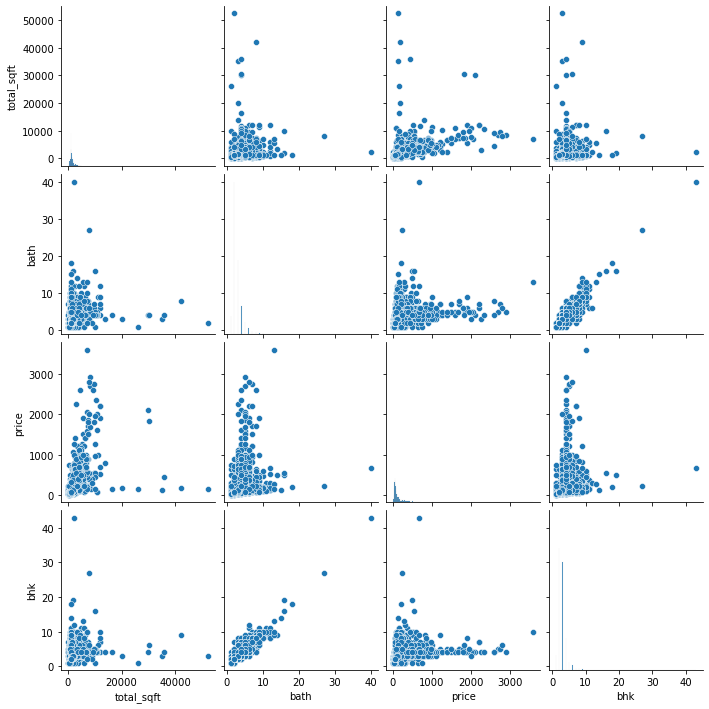

In [76]:
sns.pairplot(d2)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='bhk'>

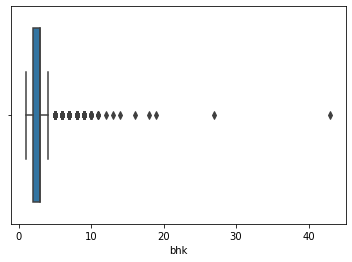

In [77]:
sns.boxplot(d2.bhk)

In [78]:
d2['pricepersqft']=(d2.price/d2.total_sqft)

In [79]:
(np.where(d2.bath>=6,5,np.where(d2.bath<=1,0,d2.bath)))

array([2, 5, 2, ..., 5, 2, 4], dtype=int8)

In [80]:
def outliers_removal(col):
    iqr=col.quantile(0.5)-col.quantile(0.25)
    upper_lim=col.quantile(0.75)+3*iqr
    lower_lim=col.quantile(0.25)-3*iqr
    col=np.where(col>=upper_lim,upper_lim,np.where(col<=lower_lim,lower_lim,col))
    return list(col)
            

In [81]:
d3=d2.copy()

In [82]:
d4=d3.drop('top_locations',axis=1)

In [83]:
d4=d4.apply(outliers_removal,axis=0)

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='bath', ylabel='Density'>

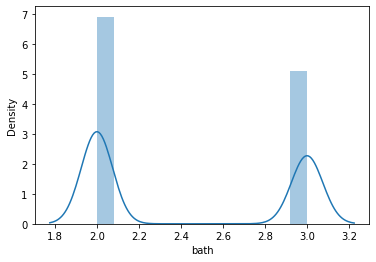

In [84]:
sns.distplot(d4.bath)

In [85]:
d4['top_loc']=d3['top_locations']

In [86]:
d4.head()

,total_sqft,bath,price,bhk,pricepersqft,top_loc
0,1056.0,2.0,39.07,2.0,0.036998,Electronic City Phase II
1,2225.0,3.0,120.00,4.0,0.046154,others
2,1440.0,2.0,62.00,3.0,0.043056,Uttarahalli
3,1521.0,3.0,95.00,3.0,0.062459,others
4,1200.0,2.0,51.00,2.0,0.042500,others


In [87]:
d3[d3.bath>3]

,total_sqft,bath,price,bhk,top_locations,pricepersqft
1,2600.0,5,120.0,4,others,0.046154
6,2732.0,4,204.0,4,others,0.074671
7,3300.0,4,600.0,4,Rajaji Nagar,0.181818
9,1020.0,6,370.0,6,others,0.362745
11,2785.0,5,295.0,4,Whitefield,0.105925
...,...,...,...,...,...,...
13303,774.0,5,70.0,5,others,0.090439
13306,1200.0,5,325.0,4,others,0.270833
13315,3453.0,4,231.0,5,Whitefield,0.066898
13316,3600.0,5,400.0,4,others,0.111111


###  ****d3 for outliers robost models ****
### ****d4 for outliers sensitive models ****

#### One Hot Encoding for Locations feature

In [88]:
from sklearn.preprocessing import OneHotEncoder as ohe
from sklearn.compose import make_column_transformer as mct

In [89]:
tf=mct(
    (ohe(sparse=False,drop='first'),['top_loc']),remainder='passthrough')

In [90]:
x=d4.drop(['price','pricepersqft'],axis=1)
y=d4.price


In [91]:
encoded_x=tf.fit_transform(x)

In [ ]:
#tf.get_feature_names_out()

In [96]:
from sklearn.model_selection import train_test_split,cross_val_score


In [97]:
X_train,X_test,y_train,y_test=train_test_split(encoded_x,y,test_size=0.3)

In [98]:
X_test.shape

(3802, 18)

In [99]:
X_test.shape

(3802, 18)

In [100]:
from xgboost import XGBRegressor as xg


In [101]:
model=xg()

In [102]:
model.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [105]:
model.score(X_test,y_test)

0.7420462233258845

In [106]:
from sklearn.ensemble import RandomForestRegressor as rfr

In [107]:
model_rf=rfr()

In [109]:
model_rf.fit(X_train,y_train)

RandomForestRegressor()

In [110]:
model_rf.score(X_test,y_test)

0.7222161460937317

In [113]:
from sklearn.model_selection import GridSearchCV

In [114]:
gsv=GridSearchCV(model_rf,{
    'n_estimators':[50,25,125,110]},cv=5
)

In [115]:
gsv.fit(encoded_x,y)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'n_estimators': [50, 25, 125, 110]})

In [116]:
gsv.best_score_

0.7207556077306165

In [117]:
gsv.best_params_

{'n_estimators': 125}

In [119]:
df_res=pd.DataFrame(gsv.cv_results_)

In [120]:
df_res

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.782286,0.011656,0.035455,0.000669,50,{'n_estimators': 50},0.718997,0.733415,0.700697,0.739594,0.708257,0.720192,0.014664,3
1,0.389495,0.004578,0.018717,0.000556,25,{'n_estimators': 25},0.717677,0.729199,0.697808,0.738253,0.706798,0.717947,0.014621,4
2,1.950451,0.023867,0.086922,0.002325,125,{'n_estimators': 125},0.720311,0.732451,0.701449,0.740757,0.708810,0.720756,0.014509,1
3,1.713069,0.022465,0.073705,0.002564,110,{'n_estimators': 110},0.720466,0.732570,0.700386,0.740644,0.709583,0.720730,0.014662,2
